In [194]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
print("Setup Complete")

Setup Complete


#### Creating a synthetic regression dataset

In [560]:
# from sklearn.datasets import make_regression

# X, y, coef = make_regression(
#     n_features=1,
#     coef=True,
#     random_state=0
# )
# X = pd.DataFrame(X)
# y = pd.Series(y)

n_samples = 1000
X = np.linspace(-5, 5, n_samples)
coef = np.random.rand()*10
y = coef * X**2 + np.random.normal(size=n_samples)

5.427836115054737


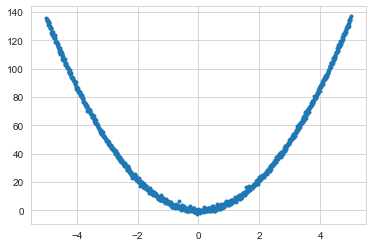

In [561]:
plt.figure()
plt.plot(
    X, y,
    marker='.',
    ls='none'
)
print(coef)

#### building the neural network

In [715]:
input_shape = [1,]

from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
# model = model = keras.Sequential([
#     layers.BatchNormalization(),
#     layers.Dense(units=512),
#     layers.Activation('relu'),
#     layers.Dense(units=1),
# ])

# # Single neuron
# model = keras.Sequential([
#     layers.Dense(units=1),
# ])

# Deep neuron network
model = keras.Sequential([
    layers.BatchNormalization(),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(units=1),
])

In [716]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer=opt,
    loss='mse',
)

In [717]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.001,
    restore_best_weights=True,
)

lr_schedule = keras.callbacks.ReduceLROnPlateau(
    patience=10,
    factor=0.5,
    min_lr=0.001,
)

In [718]:
history = model.fit(
    X, y,
    batch_size=100,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stopping, lr_schedule],
)

Epoch 1/1000
8/8 [==============================] - 2s 53ms/step - loss: 1428.3353 - val_loss: 103902.4297
Epoch 2/1000
8/8 [==============================] - 0s 19ms/step - loss: 937.8184 - val_loss: 87051.0469
Epoch 3/1000
8/8 [==============================] - 0s 19ms/step - loss: 705.4075 - val_loss: 6659.1123
Epoch 4/1000
8/8 [==============================] - 0s 19ms/step - loss: 439.2794 - val_loss: 2759.8413
Epoch 5/1000
8/8 [==============================] - 0s 19ms/step - loss: 240.8064 - val_loss: 4400.5142
Epoch 6/1000
8/8 [==============================] - 0s 19ms/step - loss: 79.5069 - val_loss: 8572.6348
Epoch 7/1000
8/8 [==============================] - 0s 19ms/step - loss: 78.5356 - val_loss: 7151.1719
Epoch 8/1000
8/8 [==============================] - 0s 19ms/step - loss: 77.3219 - val_loss: 8284.1836
Epoch 9/1000
8/8 [==============================] - 0s 19ms/step - loss: 64.8011 - val_loss: 9477.4229
Epoch 10/1000
8/8 [==============================] - 0s 20ms/ste

Epoch 80/1000
8/8 [==============================] - 0s 19ms/step - loss: 25.7757 - val_loss: 1980.2325
Epoch 81/1000
8/8 [==============================] - 0s 20ms/step - loss: 44.4004 - val_loss: 1867.3363
Epoch 82/1000
8/8 [==============================] - 0s 19ms/step - loss: 47.0531 - val_loss: 1733.4990
Epoch 83/1000
8/8 [==============================] - 0s 19ms/step - loss: 38.1437 - val_loss: 1666.2847
Epoch 84/1000
8/8 [==============================] - 0s 19ms/step - loss: 29.9121 - val_loss: 1636.7897
Epoch 85/1000
8/8 [==============================] - 0s 19ms/step - loss: 40.3969 - val_loss: 1657.1431
Epoch 86/1000
8/8 [==============================] - 0s 19ms/step - loss: 36.1678 - val_loss: 1641.6658
Epoch 87/1000
8/8 [==============================] - 0s 19ms/step - loss: 51.1925 - val_loss: 1582.8970
Epoch 88/1000
8/8 [==============================] - 0s 19ms/step - loss: 29.8742 - val_loss: 1467.9220
Epoch 89/1000
8/8 [==============================] - 0s 19ms/ste

8/8 [==============================] - 0s 20ms/step - loss: 41.7683 - val_loss: 1202.4918
Epoch 159/1000
8/8 [==============================] - 0s 19ms/step - loss: 23.2169 - val_loss: 1216.6820
Epoch 160/1000
8/8 [==============================] - 0s 19ms/step - loss: 29.9247 - val_loss: 1216.3013
Epoch 161/1000
8/8 [==============================] - 0s 19ms/step - loss: 29.4713 - val_loss: 1079.0328
Epoch 162/1000
8/8 [==============================] - 0s 19ms/step - loss: 42.0047 - val_loss: 1005.2633
Epoch 163/1000
8/8 [==============================] - 0s 20ms/step - loss: 35.6125 - val_loss: 1074.1824
Epoch 164/1000
8/8 [==============================] - 0s 19ms/step - loss: 35.3173 - val_loss: 1001.9545
Epoch 165/1000
8/8 [==============================] - 0s 19ms/step - loss: 31.3304 - val_loss: 999.5103
Epoch 166/1000
8/8 [==============================] - 0s 19ms/step - loss: 28.2424 - val_loss: 1134.2458
Epoch 167/1000
8/8 [==============================] - 0s 22ms/step - lo

8/8 [==============================] - 0s 19ms/step - loss: 26.8069 - val_loss: 1336.7897
Epoch 237/1000
8/8 [==============================] - 0s 19ms/step - loss: 20.0913 - val_loss: 1355.3002
Epoch 238/1000
8/8 [==============================] - 0s 19ms/step - loss: 29.8880 - val_loss: 1341.5023
Epoch 239/1000
8/8 [==============================] - 0s 19ms/step - loss: 38.6549 - val_loss: 1436.7124
Epoch 240/1000
8/8 [==============================] - 0s 20ms/step - loss: 34.5495 - val_loss: 1482.6938
Epoch 241/1000
8/8 [==============================] - 0s 19ms/step - loss: 51.0203 - val_loss: 1503.6904


Minimum Loss: 737.9813


<AxesSubplot:>

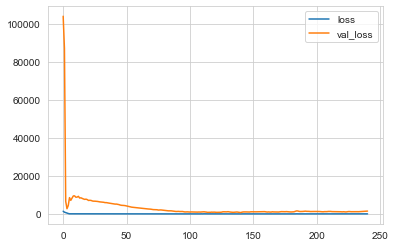

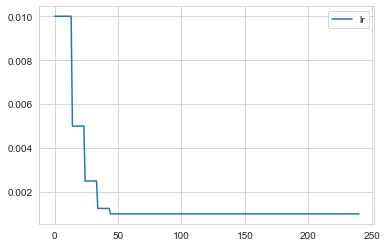

In [719]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Loss: {:0.4f}".format(history_df['val_loss'].min()));
# history_df.loc[:, ['loss',]].plot()
# print("Minimum Loss: {:0.4f}".format(history_df['loss'].min()));
history_df.loc[:, ['lr']].plot()

Text(0, 0.5, 'Target y')

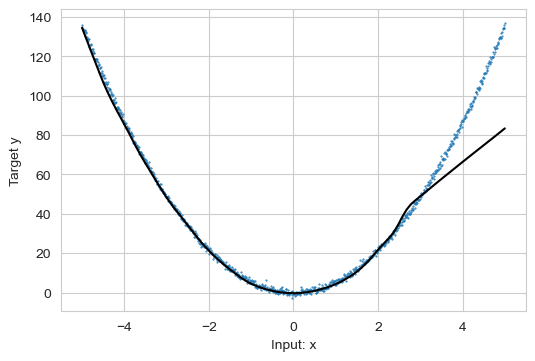

In [720]:
import tensorflow as tf
# x = tf.linspace(X.min()*1.5, X.max()*1.5, 100)
x = tf.linspace(-5, 5, 100)
y_preds = model.predict(x)

plt.figure(dpi=100)

# dataset
plt.plot(
    X, y,
    marker='.', ls='none', ms=1
)
# model
plt.plot(x, y_preds, 'k')

# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")

In [ ]:
model.get_weights()

In [694]:
model.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_87 (Batc (None, 1)                 4         
_________________________________________________________________
dense_141 (Dense)            (None, 512)               1024      
_________________________________________________________________
activation_72 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_88 (Batc (None, 512)               2048      
_________________________________________________________________
dense_142 (Dense)            (None, 256)               131328    
_________________________________________________________________
activation_73 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_89 (Batc (None, 256)             

In [695]:
model.layers

ValueError: x has 512 columns but y has 256 columns

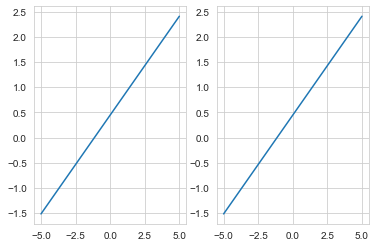

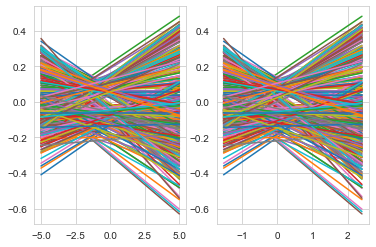

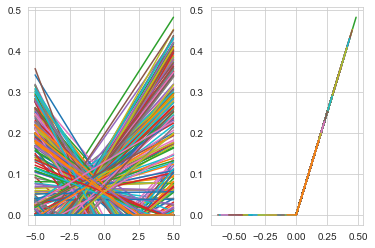

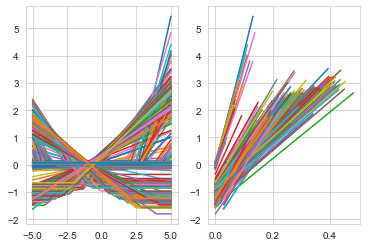

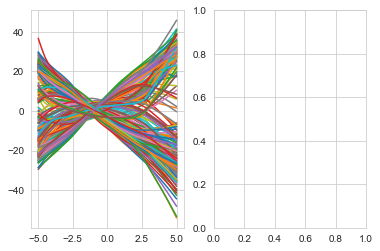

In [696]:
xx = np.linspace(-5, 5, 100)

yy0 = yy = np.expand_dims(xx, 1)

for layer in model.layers[:-1]:
    fig, axes = plt.subplots(ncols=2)
    yy = layer(yy0)
    axes[0].plot(xx, yy)
    axes[1].plot(yy0, yy)
    yy0 = yy

layer = model.layers[-1]
fig, axes = plt.subplots(ncols=2)
yy = layer(yy0)
axes[0].plot(xx, yy, color='k')
axes[0].plot(xx, yy0*layer.get_weights()[0][0])
axes[0].axhline(layer.get_weights()[1][0], color='k', ls='--')

In [ ]:
layer.get_weights()